In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [20]:
data = pd.read_csv(r"C:\Users\User\OneDrive\Documents\dataset\911.csv")
column = ['latitude', 'longitude', 'description', 'zipcode', 'title', 'timestamp'
          , 'township', 'address', 'e']
data.columns = column
data.head()

,latitude,longitude,description,zipcode,title,timestamp,township,address,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [21]:
data.drop('e', axis=1, inplace=True)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   latitude     663522 non-null  float64
 1   longitude    663522 non-null  float64
 2   description  663522 non-null  object 
 3   zipcode      583323 non-null  float64
 4   title        663522 non-null  object 
 5   timestamp    663522 non-null  object 
 6   township     663229 non-null  object 
 7   address      663522 non-null  object 
dtypes: float64(3), object(5)
memory usage: 40.5+ MB


In [23]:
pd.set_option("display.float_format", "{:.2f}".format)
data.describe()

,latitude,longitude,zipcode
count,663522.00,663522.00,583323.00
mean,40.16,-75.30,19236.06
std,0.22,1.67,298.22
min,0.00,-119.70,1104.00
25%,40.10,-75.39,19038.00
50%,40.14,-75.31,19401.00
75%,40.23,-75.21,19446.00
max,51.34,87.85,77316.00


In [24]:
data.isna().sum()

latitude           0
longitude          0
description        0
zipcode        80199
title              0
timestamp          0
township         293
address            0
dtype: int64

In [25]:
data['station_num'] = data.description.str.split('Station', expand=True)[1].str.split(';', expand=True)[0]
data.head()

,latitude,longitude,description,zipcode,title,timestamp,township,address,station_num
0,40.30,-75.58,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.00,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,332
1,40.26,-75.26,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.00,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,345
2,40.12,-75.35,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.00,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,:STA27
3,40.12,-75.34,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.00,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,308A
4,40.25,-75.60,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,329


In [26]:
data.station_num.str.replace(':', '').value_counts()[:10]

station_num
 308A    25346
 329     21895
 313     20325
 381     15949
 345     14504
 308     13963
 351     12705
 345B    12165
 317     11802
 382     11169
Name: count, dtype: int64

<BarContainer object of 10 artists>

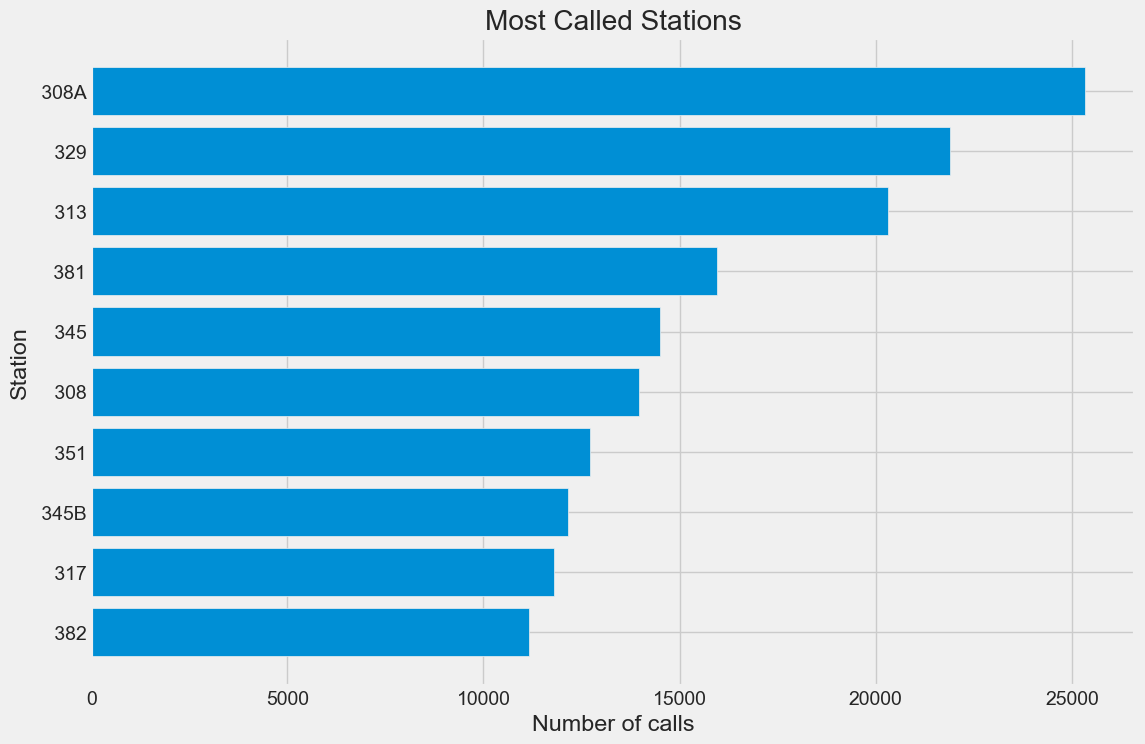

In [27]:
df = data.station_num.str.replace(':', '').value_counts()[:10]
plt.figure(figsize=(12, 8))
x = list(df.index)
y = list(df.values)
x.reverse()
y.reverse()
plt.title("Most Called Stations")
plt.ylabel("Station")
plt.xlabel("Number of calls")
plt.barh(x, y)

In [28]:
data['Reason_category'] = data.title.str.split(':', expand=True)[0]
data['Reason'] = data.title.str.split(':', expand=True)[1].str.replace(' -', '')

In [29]:
print(data.Reason.value_counts())
print(data.Reason.nunique())

Reason
 VEHICLE ACCIDENT         184749
 DISABLED VEHICLE          47917
 FIRE ALARM                38452
 FALL VICTIM               34683
 RESPIRATORY EMERGENCY     34250
                           ...  
 ARMED SUBJECT                 2
 ANIMAL COMPLAINT              1
 PRISONER IN CUSTODY           1
 HIT + RUN                     1
 FOOT PATROL                   1
Name: count, Length: 88, dtype: int64
88


In [30]:
print(data.Reason_category.value_counts())
print(data.Reason_category.nunique())

Reason_category
EMS        332692
Traffic    230208
Fire       100622
Name: count, dtype: int64
3


<BarContainer object of 10 artists>

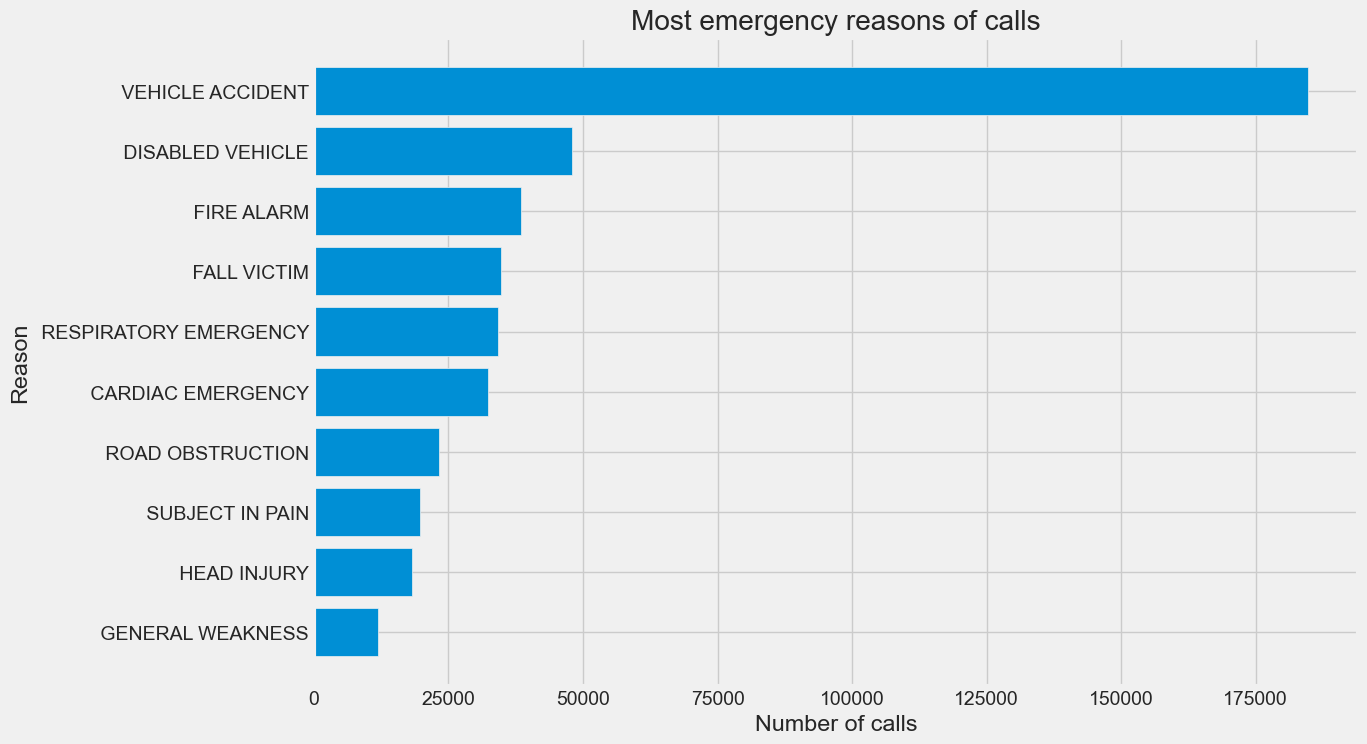

In [31]:
df = data.Reason.value_counts()[:10]
plt.figure(figsize=(12, 8))
x = list(df.index)
y = list(df.values)
x.reverse()
y.reverse()
plt.title("Most emergency reasons of calls")
plt.ylabel("Reason")
plt.xlabel("Number of calls")
plt.barh(x, y)

C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Reason_category', ylabel='count'>

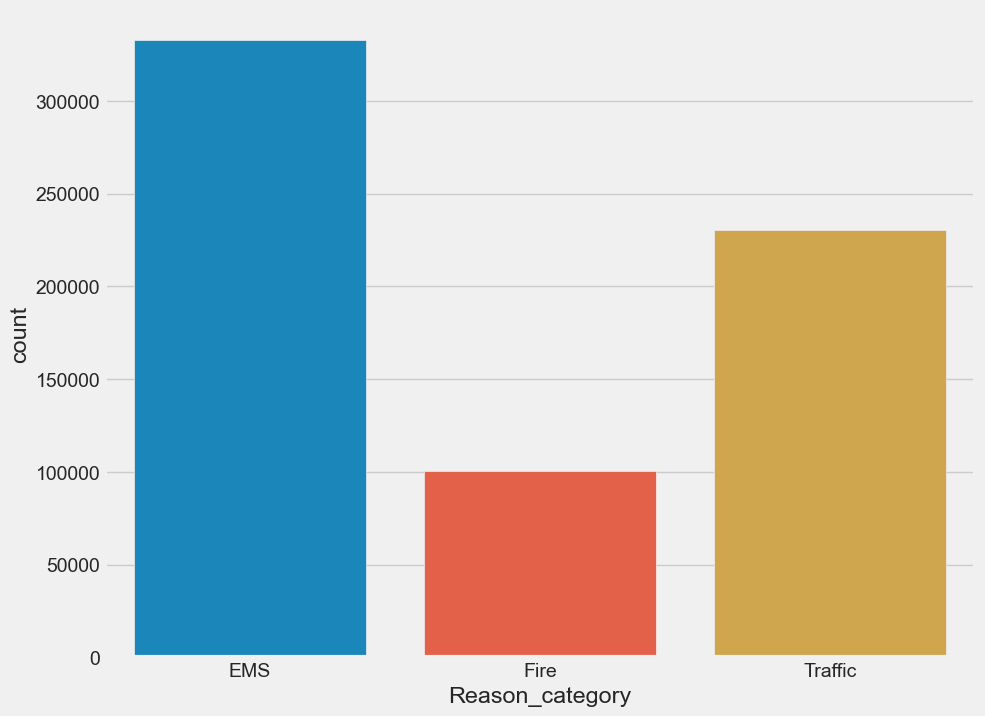

In [32]:
plt.figure(figsize=(10, 8))
sns.countplot(x=data.Reason_category, data=data)

In [33]:
data['timestamp'] = pd.to_datetime(data.timestamp)

In [34]:
data['Hour'] = data.timestamp.dt.hour
data['Month'] = data.timestamp.dt.month
data['DayOfWeek'] = data.timestamp.dt.weekday

In [35]:
data.head()

,latitude,longitude,description,zipcode,title,timestamp,township,address,station_num,Reason_category,Reason,Hour,Month,DayOfWeek
0,40.30,-75.58,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.00,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,332,EMS,BACK PAINS/INJURY,17,12,3
1,40.26,-75.26,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.00,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,345,EMS,DIABETIC EMERGENCY,17,12,3
2,40.12,-75.35,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.00,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,:STA27,Fire,GAS-ODOR/LEAK,14,12,3
3,40.12,-75.34,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.00,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,308A,EMS,CARDIAC EMERGENCY,16,12,3
4,40.25,-75.60,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,329,EMS,DIZZINESS,16,12,3


In [36]:
dmap = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}
data['DayOfWeek'] = data.DayOfWeek.map(dmap)
data.DayOfWeek.value_counts()

DayOfWeek
Fri    102942
Wed     99157
Thu     98683
Tue     97684
Mon     96745
Sat     89452
Sun     78859
Name: count, dtype: int64

C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

<Axes: xlabel='DayOfWeek', ylabel='count'>

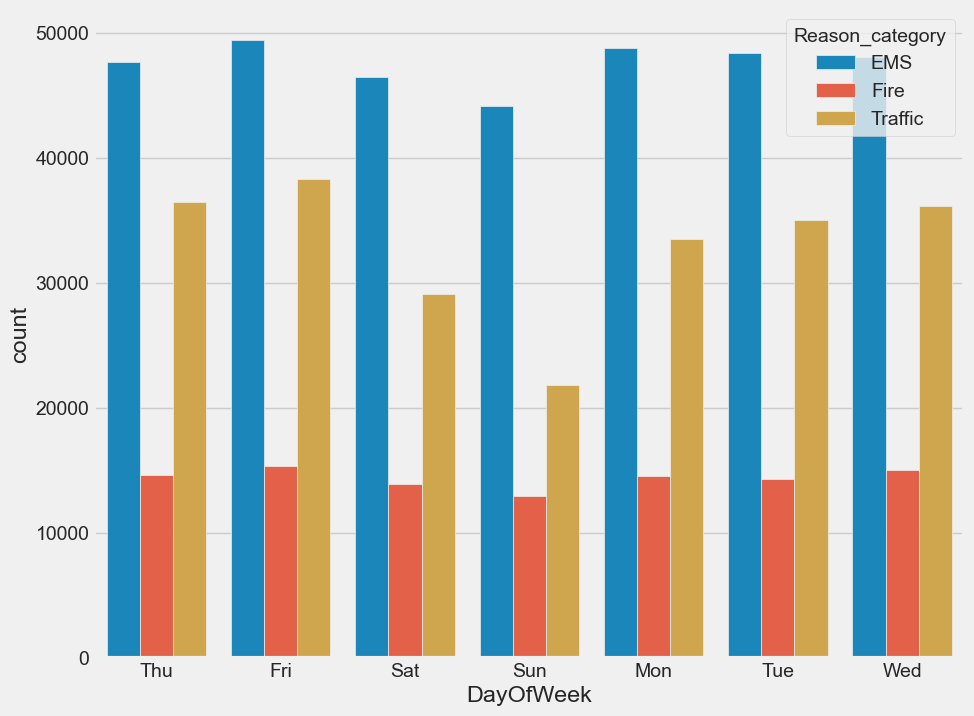

In [37]:
plt.figure(figsize=(10, 8))
sns.countplot(x=data.DayOfWeek, data=data, hue='Reason_category')

C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

<Axes: xlabel='Month', ylabel='count'>

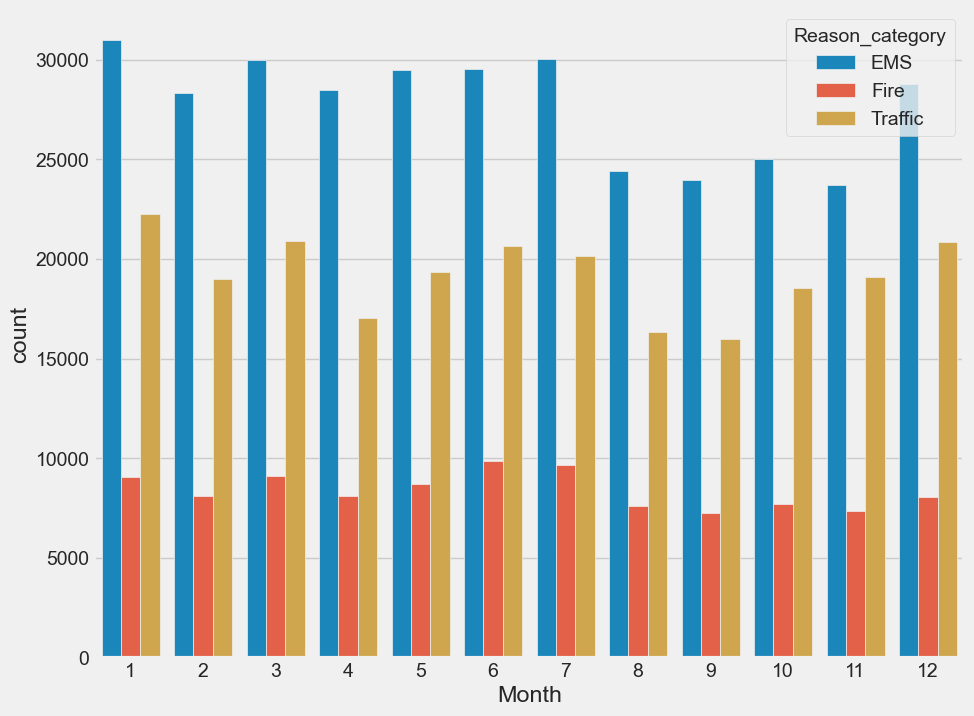

In [38]:
plt.figure(figsize=(10, 8))
sns.countplot(x=data.Month, data=data, hue='Reason_category')

In [41]:
data['Date'] = data.timestamp.dt.date
data.Date

0         2015-12-10
1         2015-12-10
2         2015-12-10
3         2015-12-10
4         2015-12-10
             ...    
663517    2020-07-29
663518    2020-07-29
663519    2020-07-29
663520    2020-07-29
663521    2020-07-29
Name: Date, Length: 663522, dtype: object

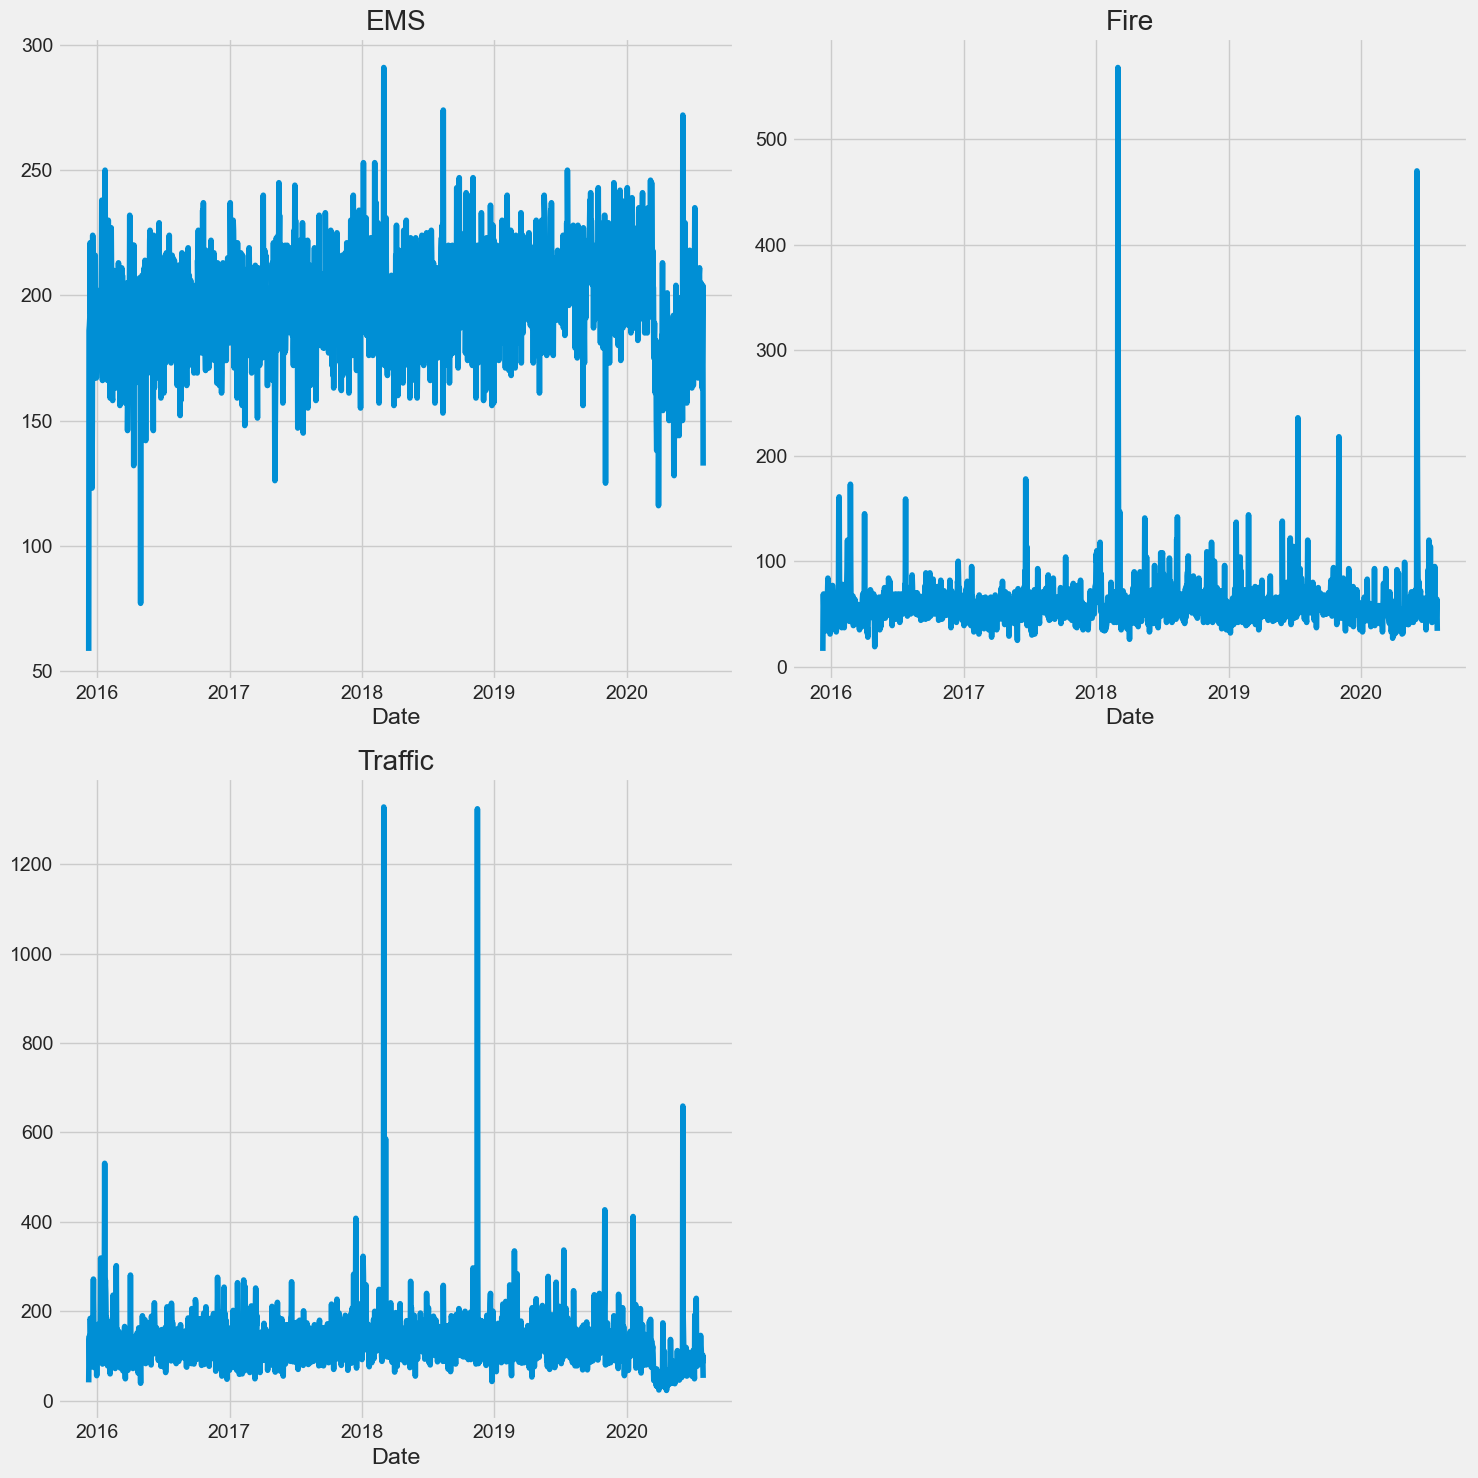

In [42]:
plt.figure(figsize=(15, 15))
for i, reason in enumerate(data.Reason_category.unique(), 1):
    plt.subplot(2, 2, i)
    data[data['Reason_category']==reason].groupby('Date').count()['township'].plot()
    plt.title(reason)
    plt.tight_layout()

<Axes: xlabel='Hour', ylabel='DayOfWeek'>

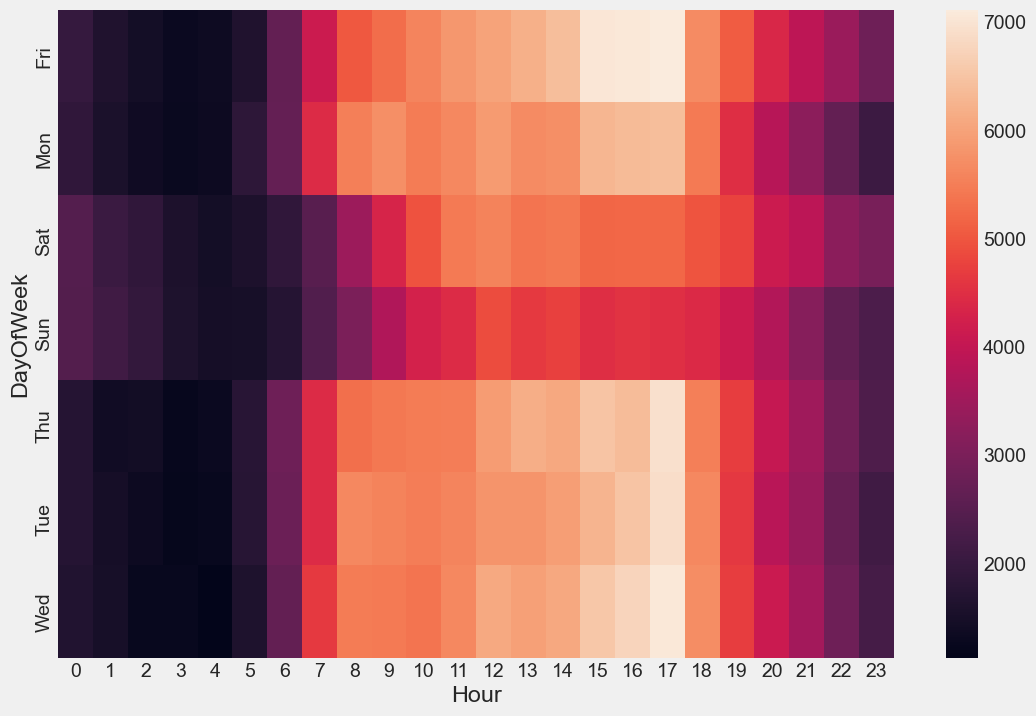

In [44]:
dayHour = data.groupby(by=['DayOfWeek','Hour']).count()['Reason_category'].unstack()
plt.figure(figsize=(12, 8))
sns.heatmap(dayHour)

<Axes: xlabel='Month', ylabel='DayOfWeek'>

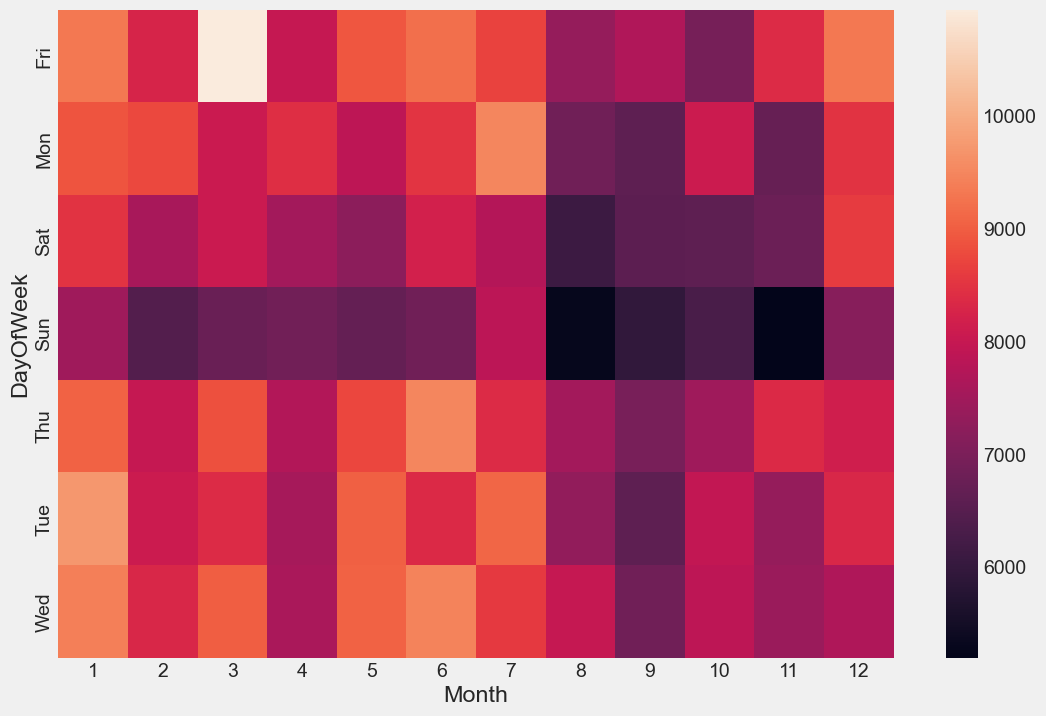

In [45]:
dayMonth = data.groupby(by=['DayOfWeek','Month']).count()['Reason_category'].unstack()
plt.figure(figsize=(12, 8))
sns.heatmap(dayMonth)

<Axes: xlabel='zipcode'>

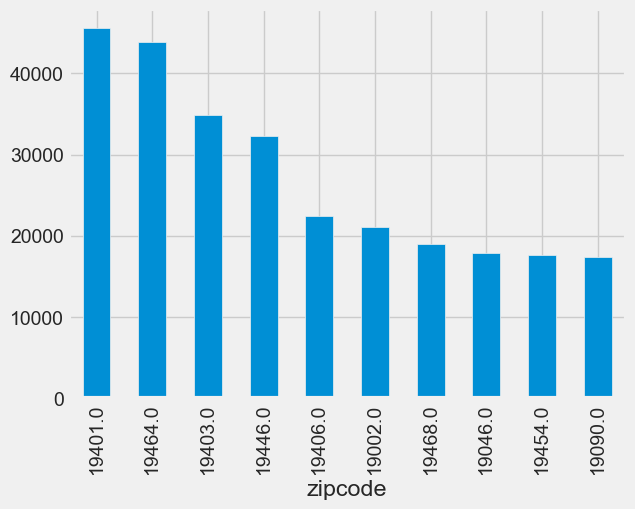

In [48]:
data['zipcode'].value_counts().head(10).plot(kind='bar')